In [110]:
import subprocess

subprocess.run(['python', 'gen_stats.py', '-update_td_every_t', '0'])

Running Simulation with task distribution estimation...
Saving stats in stats_with_learning.csv...
Running Simulation with fixed task distribution...
Saving stats in stats_without_learning.csv...


CompletedProcess(args=['python', 'gen_stats.py', '-update_td_every_t', '0'], returncode=0)

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

plt.style.use('seaborn-v0_8-dark-palette')

df_learning = pd.read_csv("stats_with_learning.csv")
df = pd.read_csv("stats_without_learning.csv")

number_of_tasks = df["number_of_tasks"].iloc[0]

df = df.drop(["number_of_tasks"], axis=1)
df_learning = df_learning.drop(["number_of_tasks"], axis=1)

print("Stats with Task Distribution Estimation\n", df_learning)
print("Stats without Task Distribution Estimation\n", df)

Stats with Task Distribution Estimation
      time  costs  serv_times   runtimes
0       0      0           0   1.696766
1       1    120           0   1.696890
2       2    160           0   1.697002
3       3    200           0   1.697111
4       4    240           0   1.697221
..    ...    ...         ...        ...
532   532  21360         170  24.415980
533   533  21400         170  24.444093
534   534  21440         170  24.493308
535   535  21480         170  24.542903
536   536  21520         236  24.577044

[537 rows x 4 columns]
Stats without Task Distribution Estimation
      time  costs  serv_times   runtimes
0       0      0           0   2.176054
1       1    120           0   2.176187
2       2    160           0   2.176312
3       3    200           0   2.176443
4       4    240           0   2.176568
..    ...    ...         ...        ...
500   500  20080         106  28.974555
501   501  20120         106  29.025582
502   502  20160         106  29.105833
503   503  

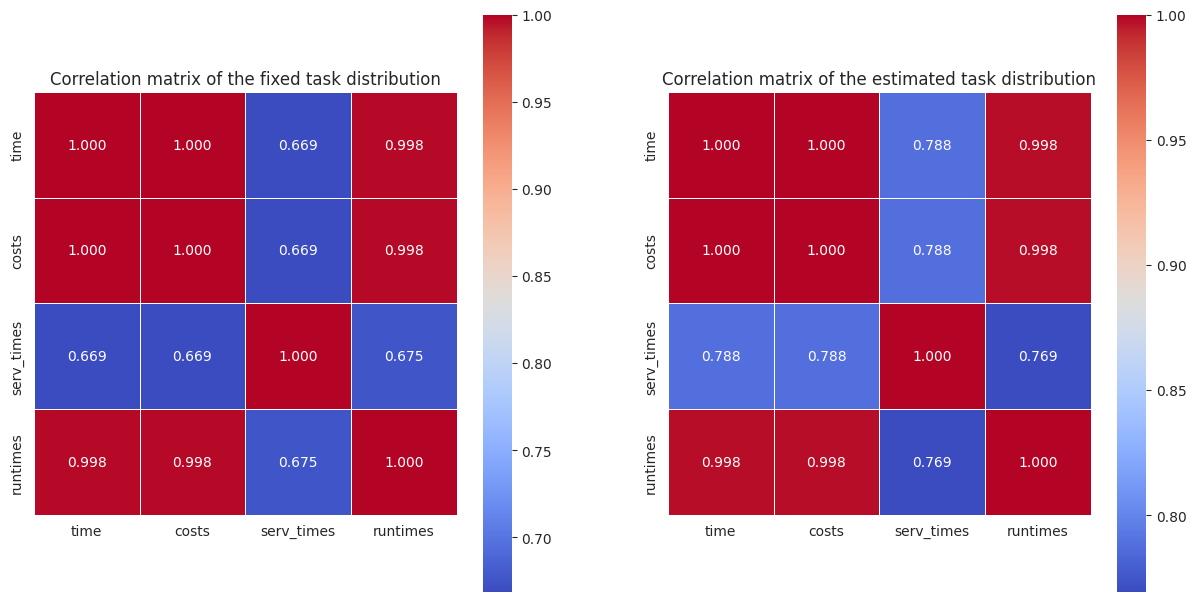

In [112]:
import seaborn as sns

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

sns.heatmap(data=df.corr(), annot=True, 
                      fmt='.3f', cmap='coolwarm', 
                      square=True, linewidths=.5, 
                      cbar_kws={'shrink': .5}, ax=ax[0])

ax[0].set_title("Correlation matrix of the fixed task distribution")

sns.heatmap(data=df_learning.corr(), annot=True, 
                      fmt='.3f', cmap='coolwarm', 
                      square=True, linewidths=.5, 
                      cbar_kws={'shrink': .5}, ax=ax[1])

ax[1].set_title("Correlation matrix of the estimated task distribution")

plt.show()

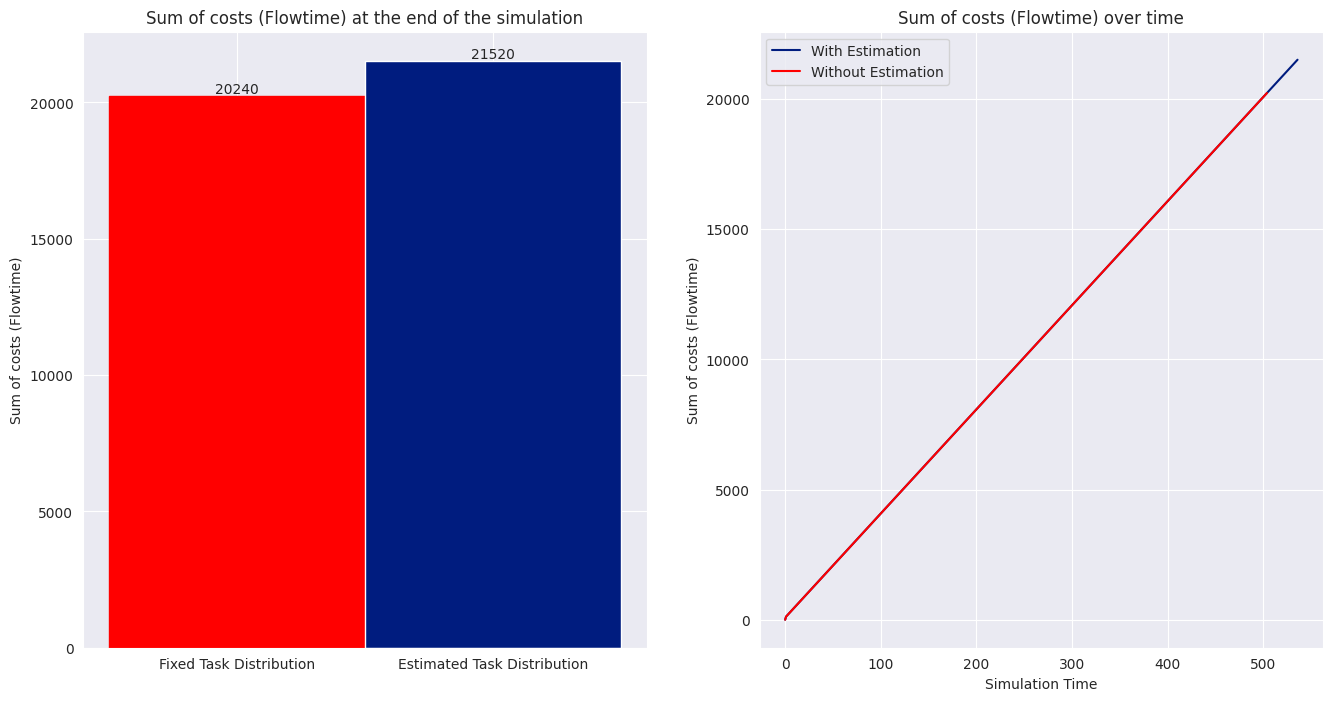

In [113]:
cost = df["costs"].iloc[-1]
cost_learning = df_learning["costs"].iloc[-1]

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

bars = ax[0].bar([0, 1], [cost, cost_learning], width=1, align='center')
ax[0].bar_label(bars, labels=[cost, cost_learning])
ax[0].set_xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])
ax[0].set_title("Sum of costs (Flowtime) at the end of the simulation")
ax[0].set_ylabel("Sum of costs (Flowtime)")
bars[0].set_color('r')

ax[1].plot(df_learning["time"], df_learning["costs"], label="With Estimation")
ax[1].plot(df["time"], df["costs"], label="Without Estimation", color="r")
ax[1].set_title("Sum of costs (Flowtime) over time")
ax[1].set_xlabel("Simulation Time")
ax[1].set_ylabel("Sum of costs (Flowtime)")

ax[1].legend()

plt.show()

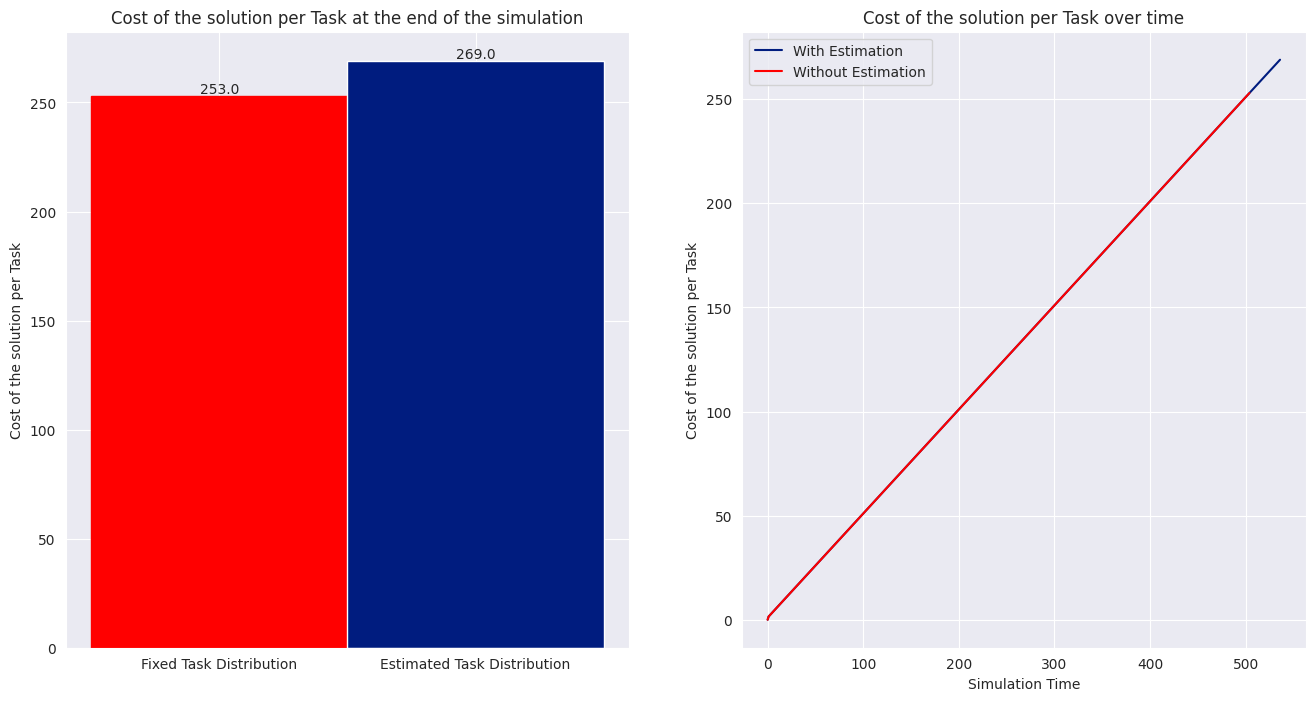

In [114]:
costs_per_task = df['costs'].apply(lambda x: x / number_of_tasks)
costs_per_task_learning  = df_learning['costs'].apply(lambda x: x / number_of_tasks)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

bars = ax[0].bar([0, 1], [costs_per_task.iloc[-1], costs_per_task_learning.iloc[-1]], width=1, align='center')
ax[0].bar_label(bars, labels=[costs_per_task.iloc[-1], costs_per_task_learning.iloc[-1]])
ax[0].set_xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])
ax[0].set_title("Cost of the solution per Task at the end of the simulation")
ax[0].set_ylabel("Cost of the solution per Task")
bars[0].set_color('r')

ax[1].plot(df_learning["time"], costs_per_task_learning, label="With Estimation")
ax[1].plot(df["time"], costs_per_task, label="Without Estimation", color="r")
ax[1].set_title("Cost of the solution per Task over time")
ax[1].set_xlabel("Simulation Time")
ax[1].set_ylabel("Cost of the solution per Task")

ax[1].legend()

plt.show()

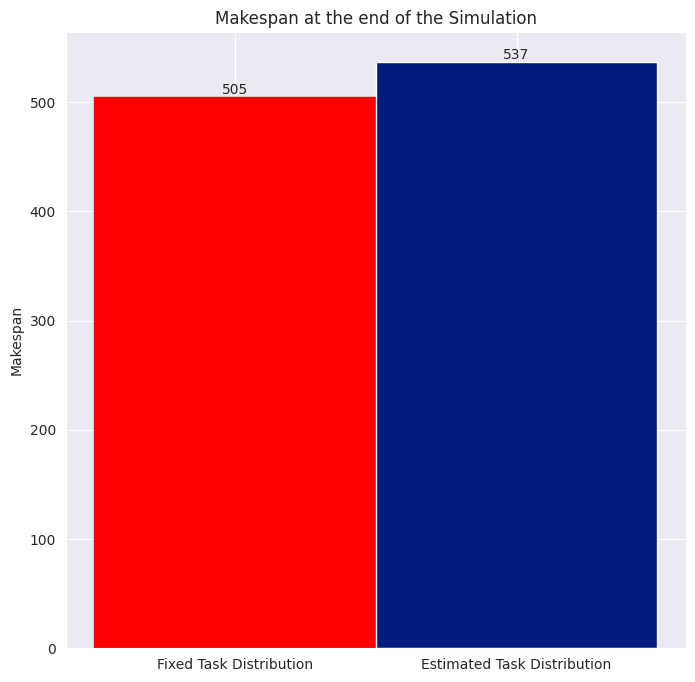

In [115]:
makespan = df["time"].iloc[-1] + 1
makespan_learning = df_learning["time"].iloc[-1] + 1

plt.figure(figsize=(8, 8))

bars = plt.bar([0, 1], [makespan, makespan_learning], width=1, align='center')
plt.bar_label(bars, labels=[makespan, makespan_learning])
plt.xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])
bars[0].set_color('r')
plt.title("Makespan at the end of the Simulation")
plt.ylabel("Makespan")

plt.show()

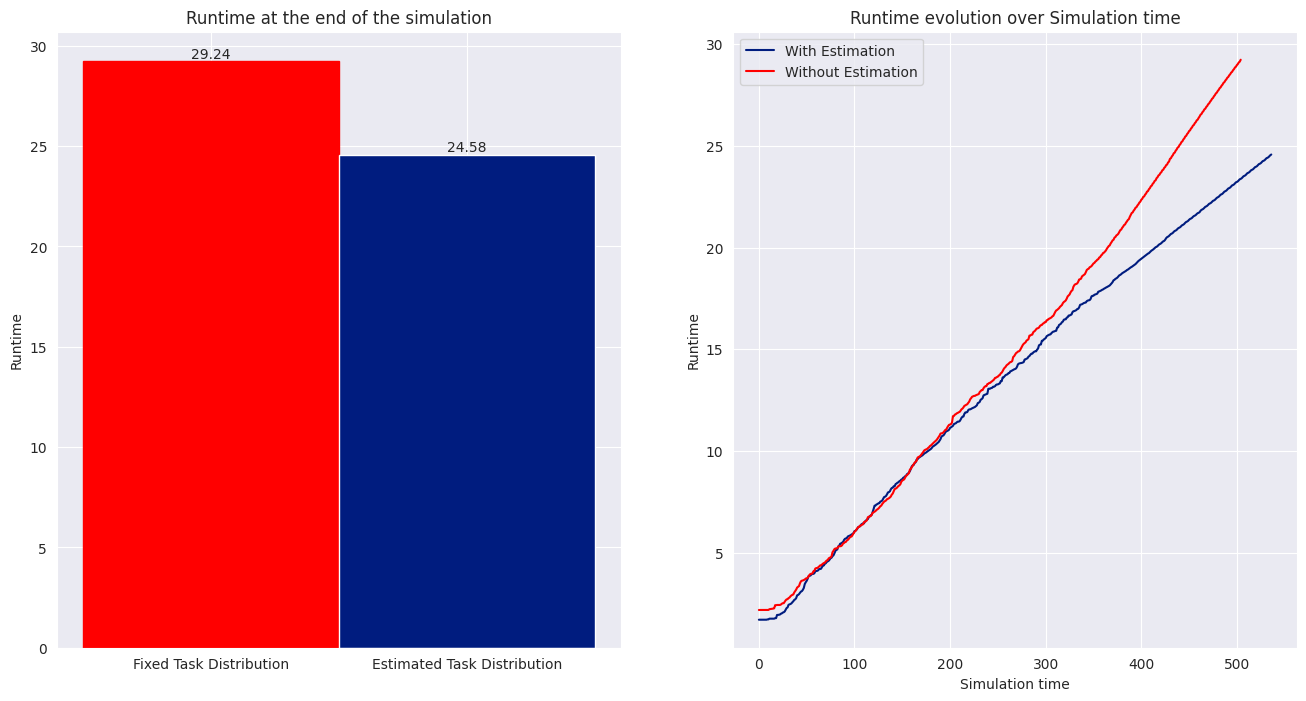

In [116]:
runtime = df["runtimes"].iloc[-1]
runtime_learning = df_learning["runtimes"].iloc[-1]

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

bars = ax[0].bar([0, 1], [runtime, runtime_learning], width=1, align='center')
ax[0].bar_label(bars, labels=["{:.2f}".format(runtime), "{:.2f}".format(runtime_learning)])
bars[0].set_color('r')
ax[0].set_title("Runtime at the end of the simulation")
ax[0].set_ylabel("Runtime")
ax[0].set_xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])

ax[1].plot(df_learning["time"], df_learning["runtimes"], label="With Estimation")
ax[1].plot(df["time"], df["runtimes"], label="Without Estimation", color="r")
ax[1].set_title("Runtime evolution over Simulation time")
ax[1].set_xlabel('Simulation time')
ax[1].set_ylabel("Runtime")

ax[1].legend()

plt.show()

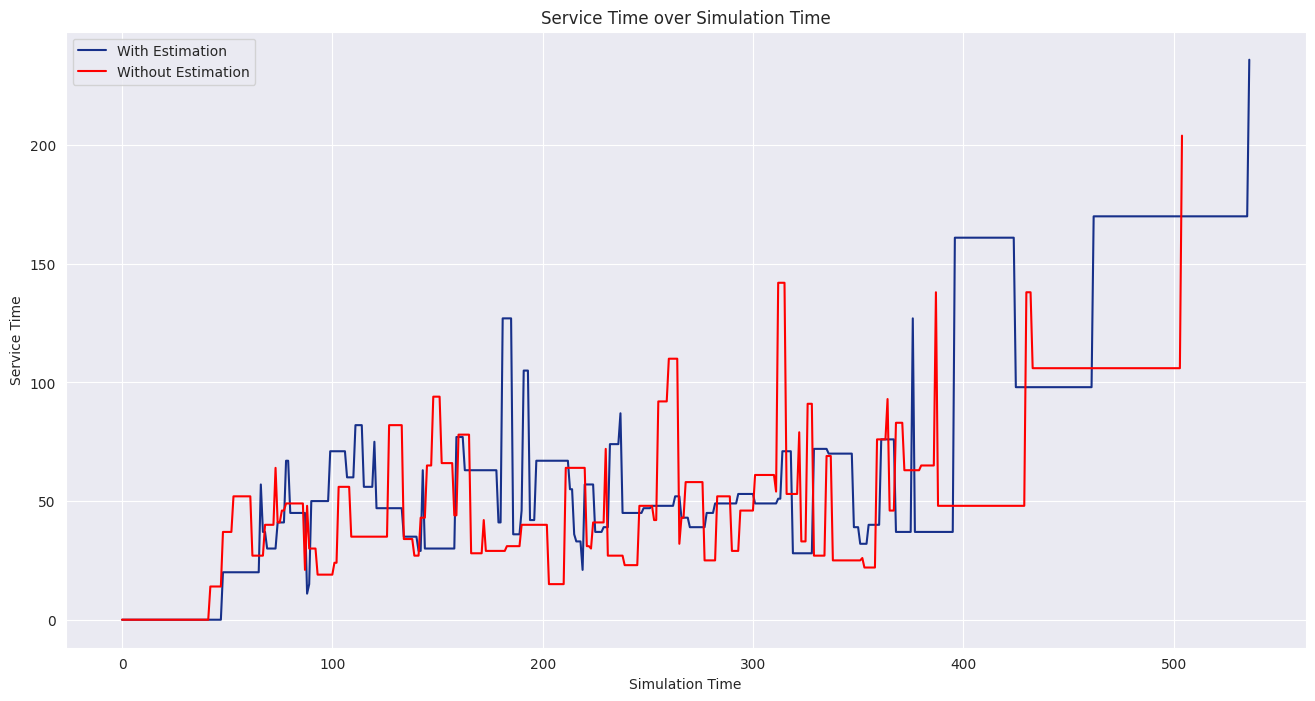

In [117]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

ax.plot(df_learning["time"], df_learning["serv_times"], label="With Estimation", alpha=0.9)
ax.plot(df["time"], df["serv_times"], label="Without Estimation", color="r")
ax.set_ylabel('Service Time')
ax.set_xlabel('Simulation Time')
ax.set_title('Service Time over Simulation Time')

ax.legend(loc="upper left")

plt.show()